In [56]:
%matplotlib inline
import matplotlib.pyplot as plt
import glob as glob
import numpy as np
import os
import mdtraj as md

In [57]:
data_dir = "./prod"


#prefix="ala10_pull_fRange_fmin-10_fmax10"
prefix="ala10_pull_fRange_fmin-10_fmax100"


temperature = 310
kcal_to_pN = 69.4786
output_dir = 'figures'

save_fig = True
if save_fig:    
    !mkdir -p {output_dir}

def ba(bins):
    return (bins[1:]+bins[:-1])/2.0

<ipython-input-58-606d75e1921b>:16: RuntimeWarning: divide by zero encountered in log
  fe = -np.log(hist.T)


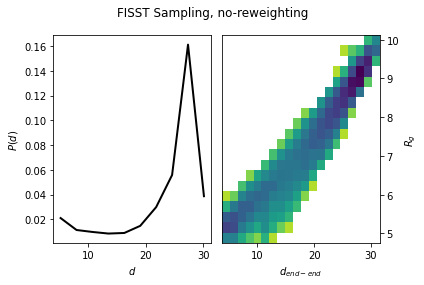

In [58]:
vmax=10

fisst_data = np.loadtxt(os.path.join(data_dir,prefix+".observable.txt"))
fisst_data = fisst_data[len(fisst_data)//2:,]
fisst_coordinates = np.loadtxt(os.path.join(data_dir,prefix+".colvar.txt"))
fisst_coordinates = fisst_coordinates[len(fisst_coordinates)//2:,:]

fig, ax = plt.subplots(1,2)
hist, bins = np.histogram(fisst_coordinates[:,1],density=True)
plt.suptitle('FISST Sampling, no-reweighting')
ax[0].plot(ba(bins),hist,lw='2',color='k')
ax[0].set_ylabel('$P(d)$')
ax[0].set_xlabel('$d$')

hist, xedges, yedges = np.histogram2d(fisst_coordinates[:,1],fisst_coordinates[:,2],bins=20,density=True)
fe = -np.log(hist.T)
fe -= fe.min()
extent = (xedges.min(),xedges.max(),yedges.min(),yedges.max())
ax[1].imshow(fe,extent=extent,vmin=0,vmax=vmax,origin='lower',aspect='auto')
ax[1].set_ylabel('$R_g$')
ax[1].set_xlabel('$d_{end-end}$')
#ax[1].color_bar()
ax[1].yaxis.tick_right()
ax[1].yaxis.set_label_position("right")


fig.tight_layout()

#plt.xlim(-8,8)
#plt.ylim(-3,8)

if save_fig: plt.savefig(os.path.join(output_dir,'ala10_fisst_sampling.png'),dpi=72)


#plt.figure()
#plt.plot(fisst_coordinates[:,1],fisst_coordinates[:,2])
#hist, bins = np.histogram(fisst_data[:,2],density=True)
#plt.plot(bins[:-1],hist)



In [59]:
#get_temp_columns
for i in range(4,fisst_data.shape[1],2):
    print(i,"%.4f"%(fisst_data[0,i]*kcal_to_pN))
#for -10 to 10
#force_column_indices = [4,22,34,52,64]

#for -10 to 100
force_column_indices = [4,16,26,44,64]

force_list = [fisst_data[0,idx]*kcal_to_pN for idx in force_column_indices]

4 -9.8447
6 -9.1622
8 -7.9416
10 -6.1947
12 -3.9387
14 -1.1962
16 2.0057
18 5.6350
20 9.6559
22 14.0282
24 18.7085
26 23.6504
28 28.8047
30 34.1201
32 39.5439
34 45.0221
36 50.5004
38 55.9242
40 61.2396
42 66.3939
44 71.3357
46 76.0160
48 80.3884
50 84.4092
52 88.0386
54 91.2405
56 93.9830
58 96.2390
60 97.9859
62 99.2065
64 99.8889


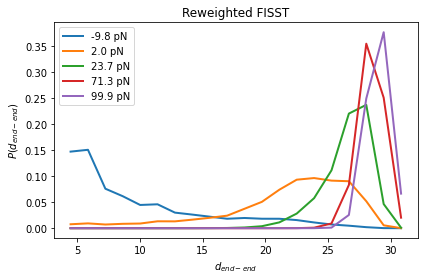

In [60]:
plt.figure(figsize=(6,4))
for dataidx,force_index in enumerate(force_column_indices):
    weights = fisst_data[:,force_index+1]
    
    hist, bins = np.histogram(fisst_data[:,2], \
                                          bins=20,density=True,weights=weights)
    #hist2, bins2 = np.histogram(fisst_coordinates[:,2], \
    #                                      bins=20,density=True,weights=weights)
    plt.plot(ba(bins),hist,label="%.1f pN"%force_list[dataidx],lw=2)
#plt.plot(ba(bins2),hist2,label="%.1f pN"%test_F,linewidth=3)

plt.xlabel('$d_{end-end}$')
plt.ylabel('$P(d_{end-end})$')
plt.title("Reweighted FISST")
plt.legend(loc=0)
plt.tight_layout()
if save_fig: plt.savefig(os.path.join(output_dir,'fisst_sampling_reweighted.jpg'),dpi=72)

    #break
    

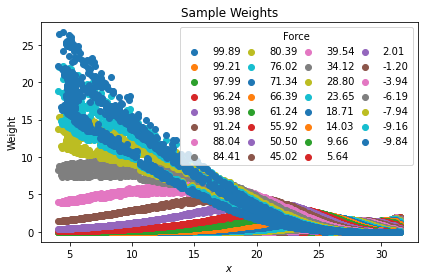

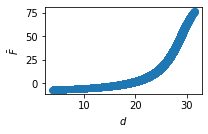

In [61]:
plt.figure(figsize=(6,4))
for i in reversed(range(5,fisst_data.shape[1],2)):
    #hist, bins = np.histogram(fisst_data[:,i])
    plt.scatter(fisst_data[::10,2],fisst_data[::10,i],label='%.2f'%(fisst_data[0,i-1]*kcal_to_pN))
    #plt.plot(bins[:-1],hist,label='%f'%fisst_data[0,i-1])
plt.legend(loc=0,ncol=4,columnspacing=0,title='Force')
plt.ylabel('Weight')
plt.xlabel('$x$')
plt.title('Sample Weights')
#plt.ylim(0,1)
plt.tight_layout()
if save_fig: plt.savefig(os.path.join(output_dir,'sample_weights.jpg'),dpi=72)

plt.figure(figsize=(3,2))
plt.scatter(fisst_data[:,2],fisst_data[:,3]*kcal_to_pN)
plt.ylabel('$\\bar{F}$')
plt.xlabel('$d$')
plt.tight_layout()
if save_fig: plt.savefig(os.path.join(output_dir,'avg_F_applied.jpg'),dpi=72)

In [62]:
import mdtraj as md
import glob
!ls {data_dir}
trj_file = glob.glob(f"{data_dir}/*100pN*.xtc")[0]
gro_file = glob.glob(f"{data_dir}/*100pN*.gro")[0]
trj = md.load(trj_file,top=gro_file)
trj = trj[len(trj)//2:]
#print(trj.time)
#print(fisst_data[::5,0]/1e3)

ala10_fisst_-10pN_100pN.progress.txt
ala10_fisst_-10pN_100pN.run.100000000.cpt
ala10_fisst_-10pN_100pN.run.100000000.edr
ala10_fisst_-10pN_100pN.run.100000000.gro
ala10_fisst_-10pN_100pN.run.100000000.log
ala10_fisst_-10pN_100pN.run.100000000.xtc
ala10_fisst_-10pN_100pN.run.100000000_prev.cpt
ala10_fisst_-10pN_10pN.progress.txt
ala10_fisst_-10pN_10pN.run.100000000.cpt
ala10_fisst_-10pN_10pN.run.100000000.edr
ala10_fisst_-10pN_10pN.run.100000000.gro
ala10_fisst_-10pN_10pN.run.100000000.log
ala10_fisst_-10pN_10pN.run.100000000.xtc
ala10_fisst_-10pN_10pN.run.100000000_prev.cpt
ala10_pull_fRange_fmin-10_fmax10.colvar.txt
ala10_pull_fRange_fmin-10_fmax10.observable.txt
ala10_pull_fRange_fmin-10_fmax10.restart.txt
ala10_pull_fRange_fmin-10_fmax100.colvar.txt
ala10_pull_fRange_fmin-10_fmax100.observable.txt
ala10_pull_fRange_fmin-10_fmax100.restart.txt


/home/gmh4/.local/lib/python3.8/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (SOL, ALA)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))
/home/gmh4/.local/lib/python3.8/site-packages/mdtraj/formats/gro.py:307: UserWarning: WARNING: two consecutive residues with same number (SOL, HOH)
  warnings.warn("WARNING: two consecutive residues with same number (%s, %s)" % (thisresname, residue.name))


In [63]:
md.compute_phi(trj)[1].shape

(10001, 9)

<ipython-input-70-dbf26c41a8f2>:13: RuntimeWarning: divide by zero encountered in log
  fe = -np.log(hist.T)


16.58336766999067
12.871891549976803
19.859440397246697
45.224946483593584
61.028755253498865


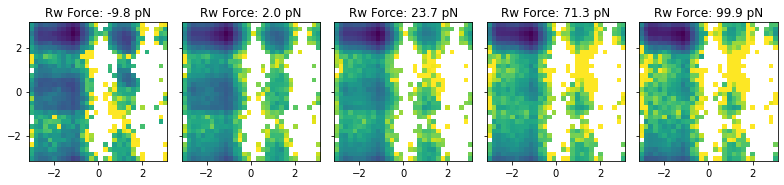

In [70]:
fig, ax = plt.subplots(ncols=5,nrows=1,sharex=True,sharey=True,figsize=(11,4))

for dataidx,force_index in enumerate(force_column_indices):
    weights = fisst_data[::5,force_index+1]
    phis, psis = md.compute_phi(trj)[1], md.compute_psi(trj)[1]
    n_diheds = phis.shape[1]
    weights_duplicate = np.array([ [weight]*n_diheds for weight in weights  ]).flatten()
        
    hist, xedges, yedges = np.histogram2d(phis.flatten(),psis.flatten(), \
                                          bins=30,density=True,weights=weights_duplicate)
    #hist, xedges, yedges = np.histogram2d(phis[:,1].flatten(),psis[:,1].flatten(), \
    #                                      bins=20,density=True,weights=weights)
    fe = -np.log(hist.T)
    fe -= fe.min()
    print(fe[np.isfinite(fe)].max())
    extent = (xedges.min(),xedges.max(),yedges.min(),yedges.max())
    
    im = ax[dataidx].imshow(fe,extent=extent,vmin=0,vmax=10,origin='lower')
    ax[dataidx].set_title('Rw Force: %.1f pN'%force_list[dataidx])
plt.tight_layout()
if save_fig: fig.savefig(os.path.join(output_dir,'rama_biased.jpg'),dpi=72)


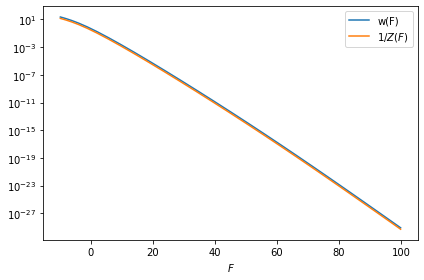

In [65]:
restart_data = np.loadtxt(os.path.join(data_dir,prefix+".restart.txt"))
weight_data = restart_data[-1,:]
force_weights = weight_data[5::4]
forces = weight_data[3::4]
zs = weight_data[6::4]
plt.plot(forces*kcal_to_pN,force_weights,label='w(F)')
plt.plot(forces*kcal_to_pN,1/zs,label='$1/Z(F)$')
plt.xlabel('$F$')
plt.yscale('log')
plt.legend()
plt.tight_layout()
#if save_fig is True: plt.savefig(os.path.join(output_dir,'weights_and_zinv.pdf'))


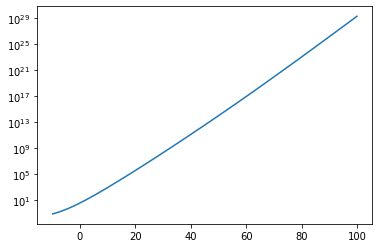

In [66]:
plt.plot(forces*kcal_to_pN,zs)
plt.yscale('log')

In [67]:
import numba
from scipy.interpolate import interp1d

@numba.jit(nopython=True)
def compute_observable_weights_from_restart(restart_data_t,beta=1.0):
    forces = restart_data_t[7:len(restart_data_t):4]
    obs_num = forces.max() - forces.min()
    
    Q_i = restart_data_t[2]

    n_interpolation = (len(restart_data_t)-4)//4
    observable_weights = np.zeros(n_interpolation)

    for j in range(n_interpolation):
        z_j = restart_data_t[4+4*j+2]
        f_j = restart_data_t[4+4*j+3]
        denum_integral = 0.0;

        for k in range(n_interpolation):
            f_k = restart_data_t[4+4*k+3]
            w_k = restart_data_t[4+4*k+1]
            g_k = restart_data_t[4+4*k]
            denum_integral += g_k*w_k*np.exp(beta*(f_k-f_j)*Q_i)
        observable_weights[j] = obs_num/(denum_integral*z_j)
    return observable_weights

@numba.jit()
def compute_observable_weight_F_from_restart(F_in_pN, restart_data_all,beta=1.0):
    F = F_in_pN/kcal_to_pN
    forces = restart_data_all[-1,3:len(restart_data_all[-1]):4]
    obs_num = forces.max() - forces.min()
    print(forces.max(),forces.min())
    
    observable_weights = np.zeros(len(restart_data_all))

    for timeidx, restart_data_t in enumerate(restart_data_all):
        Q_i = restart_data_t[2]

        n_interpolation = (len(restart_data_t)-4)//4
        
        z_list = restart_data_t[6:len(restart_data_t):4]
        z_interp = interp1d(forces,z_list)
        zF = z_interp(F)
        #plt.plot(forces,z_list)
        #plt.scatter([F],[zF])        
        denum_integral = 0.0;

        for k in range(n_interpolation):
            f_k = restart_data_t[4+4*k+3]
            w_k = restart_data_t[4+4*k+1]
            g_k = restart_data_t[4+4*k]
            denum_integral += g_k*w_k*np.exp(beta*(f_k-F)*Q_i)
        observable_weights[timeidx] = obs_num/(denum_integral*zF)
    return observable_weights




<ipython-input-67-5656d9816d4c>:27: NumbaWarning: 
Compilation is falling back to object mode WITH looplifting enabled because Function "compute_observable_weight_F_from_restart" failed type inference due to: Untyped global name 'interp1d': Cannot determine Numba type of <class 'type'>

File "<ipython-input-67-5656d9816d4c>", line 42:
def compute_observable_weight_F_from_restart(F_in_pN, restart_data_all,beta=1.0):
    <source elided>
        z_list = restart_data_t[6:len(restart_data_t):4]
        z_interp = interp1d(forces,z_list)
        ^

  @numba.jit()
<ipython-input-67-5656d9816d4c>:27: NumbaWarning: 
Compilation is falling back to object mode WITHOUT looplifting enabled because Function "compute_observable_weight_F_from_restart" failed type inference due to: Cannot determine Numba type of <class 'numba.core.dispatcher.LiftedLoop'>

File "<ipython-input-67-5656d9816d4c>", line 36:
def compute_observable_weight_F_from_restart(F_in_pN, restart_data_all,beta=1.0):
    <source elide

1.437693 -0.1416933


/home/gmh4/.local/lib/python3.8/site-packages/numba/core/object_mode_passes.py:151: NumbaWarning: Function "compute_observable_weight_F_from_restart" was compiled in object mode without forceobj=True.

File "<ipython-input-67-5656d9816d4c>", line 36:
def compute_observable_weight_F_from_restart(F_in_pN, restart_data_all,beta=1.0):
    <source elided>

    for timeidx, restart_data_t in enumerate(restart_data_all):
    ^

  warnings.warn(errors.NumbaWarning(warn_msg,
/home/gmh4/.local/lib/python3.8/site-packages/numba/core/object_mode_passes.py:161: NumbaDeprecationWarning: 
Fall-back from the nopython compilation path to the object mode compilation path has been detected, this is deprecated behaviour.

For more information visit https://numba.pydata.org/numba-doc/latest/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit

File "<ipython-input-67-5656d9816d4c>", line 36:
def compute_observable_weight_F_from_restart(F_in_pN, restart_data_all,beta=1.0)

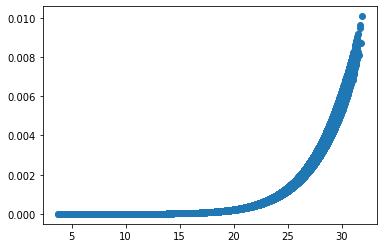

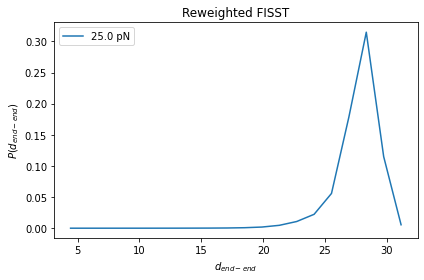

In [68]:
test_F = 25.0
test_weights = compute_observable_weight_F_from_restart(test_F,restart_data[len(restart_data)//2:])
plt.scatter(restart_data[len(restart_data)//2:,2],test_weights)

plt.figure()
hist2, bins2 = np.histogram(restart_data[len(restart_data)//2:,2], \
                    bins=20,density=True,weights=test_weights)
plt.plot(ba(bins2),hist2,label="%.1f pN"%test_F)
plt.xlabel('$d_{end-end}$')
plt.ylabel('$P(d_{end-end})$')
plt.title("Reweighted FISST")
plt.legend(loc=0)
plt.tight_layout()
#plt.ylim(0,1)
#i=35
#plt.scatter(fisst_data[::10,2],fisst_data[::10,i],label='%.1f'%fisst_data[0,i-1])

In [69]:
print("here")

here
